# Assignment 6: Numpy II and Matplotlib

***

__Question 1:__ (2.0 points) 

1. (0.5 point) Create a two-dimensional numpy array called <font color='blue'>A</font> with six rows and three columns by broadcasting the array [1 2 3 4 5 6].
2. (0.5 point) Create arrays <font color='blue'>B</font> and <font color='blue'>C</font> where <font color='blue'>B</font> is copy and <font color='blue'>C</font> is a view of <font color='blue'>A</font>, respectively. Use the method "id()" to make sure <font color='blue'>B</font> and <font color='blue'>C</font> do not reference to the same location as <font color='blue'>A</font>. 
3. (1.0 point) Reshape <font color='blue'>C</font> to have nine rows and two columns and create a new variable <font color='blue'>D</font> by copying the rows 3,6, and 8 from <font color='blue'>D</font>. 

In [1]:
# solution 

import numpy as np

pre_a = np.array(np.arange(1,7))
A = np.zeros((6,3))
A[:] = pre_a[:,np.newaxis]
print('array a:\n',A)

C = A.view()
B = C[:]



print('\nid(A): ',id(A),'id(B): ',id(B),'id(C): ',id(C),)

C = C.reshape((9,2))
print('array C:\n',C)

# rows 3,6,8 correspond with 2,5,7 
D = C[[2,5,7],:]
D

array a:
 [[ 1.  1.  1.]
 [ 2.  2.  2.]
 [ 3.  3.  3.]
 [ 4.  4.  4.]
 [ 5.  5.  5.]
 [ 6.  6.  6.]]

id(A):  4582960464 id(B):  4583064240 id(C):  4668280144
array C:
 [[ 1.  1.]
 [ 1.  2.]
 [ 2.  2.]
 [ 3.  3.]
 [ 3.  4.]
 [ 4.  4.]
 [ 5.  5.]
 [ 5.  6.]
 [ 6.  6.]]


array([[ 2.,  2.],
       [ 4.,  4.],
       [ 5.,  6.]])

***

__Question 2:__ (2.0 points) Consider an $n\times n,\, n\geq 2$ array <font color='blue'>A</font>. For instance, with $n=4$:
$$
A=\left(\begin{array}[cccc]\\
1 & 3 & 2 & 6 \\
3 & 5 & 1 & {7} \\
{0} & 4 & {2} & {6} \\
6 & 1 & 3 & {1} 
\end{array}\right)
$$
Create a 2$\times$2 array <font color='blue'>B</font> where the first row corresponds to the minimal and maximal elements in the upper triangluar part of <font color='blue'>A</font> and the second row corresponds to the minimal and maximal elements in the lower triangluar part of <font color='blue'>A</font>. The main diagonal should be considered as belonging to both the upper and lower triangular part of <font color='blue'>A</font>. In the above example the solution would be 
$$
B=\left(\begin{array}[cc]\\
1 & 7  \\
0 & 6  
\end{array}\right)
$$
Your solution (the python code) should work for any $n\times n,\, n\geq 2$ array.<br>
__Hint__: Use the numpy methods "triu_indices" and "tril_indices" combined with "max" and "min".

In [2]:
# solution

# Run you code in the example to make sure it is working. 

#n = 4
A = np.array([[1,3,2,6],[3,5,1,7],[0,4,2,6],[6,1,3,1]])

zer = np.zeros((5,5))
lower5 = np.tril_indices(5)
upper5 = np.triu_indices(5)


test_arr = np.arange(0,25).reshape((5,5))
print(test_arr)
print('max:',max(test_arr[upper5]))
#output = np.array([min(test_arr[upper5]),max(test_arr[upper5])],[min(test_arr[lower5]),max(test_arr[lower5])])
#test = np.array([[min(test_arr[upper5]),max(test_arr[upper5])],[min(test_arr[lower5]),max(test_arr[lower5])]])
#print(type(test))


# function below performs the operations required in the question
def maxminsrq(arr_input):
    leng = arr_input.shape[0]
    upper = np.triu_indices(leng)
    lower = np.tril_indices(leng)
    output = np.array([[min(arr_input[upper]),max(arr_input[upper])],[min(arr_input[lower]),max(arr_input[lower])]])
    return output

n = 5
A = np.random.rand(n,n)
print(A)

print(maxminsrq(A))


[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]
max: 24
[[ 0.45025811  0.97263318  0.03074517  0.63360678  0.92120689]
 [ 0.52809043  0.76034247  0.5378023   0.75418042  0.19998359]
 [ 0.95785802  0.46560755  0.28134973  0.04904463  0.1292082 ]
 [ 0.60684063  0.77274513  0.90695241  0.62252341  0.54895321]
 [ 0.2147402   0.88056368  0.13972644  0.98343676  0.91893652]]
[[ 0.03074517  0.97263318]
 [ 0.13972644  0.98343676]]


__Question 3:__ (3.0 points) Given a set of points $(x_0,y_0),(x_1,y_1),\ldots,(x_n,y_n)$, we can fit a line $y=\alpha_0+\alpha_1 x$ to the points by solving a linear system of the form:

$$
A^\top A\alpha = A^\top b
$$

where $A^\top$ is the transpose of $A$ and 

$$
A=\left(\begin{array}{cc}
1 & x_0 \\
1 & x_1 \\
\vdots & \vdots \\
1 & x_n 
\end{array}\right),
\qquad
\alpha = \left(\begin{array}{c}
\alpha_0 \\
\alpha_1 
\end{array}\right),
\qquad
b = \left(\begin{array}{c}
y_0 \\
y_1 \\
\vdots \\
y_n
\end{array}\right)
$$

Supposing the points $(x_i,y_i)$ are generated by the code:

```python
x = np.random.uniform(0,1,100)
y = 1.0-x+np.random.uniform(-0.3,0.3,100)
```

1. (1.5 points) Build the matrix (array) $A$
2. (1.5 points) Solve the linear system $A^\top A\alpha = A^\top b$ using "numpy.linalg.solve" and print the value of $\alpha_0$ and $\alpha_1$.


In [9]:
# Solution
x = np.random.uniform(0,1,100)
y = 1.0-x+np.random.uniform(-0.3,0.3,100)
# above creates np.arrays of shape (100,)

A = np.empty((100,2),dtype=float)
A[:,0] = 1
for ea in np.arange(0,100): A[ea,1] = x[ea]
A_transp  =  A.transpose()
#print(A_transp)

sol =  np.linalg.solve(np.dot(A_transp,A),np.dot(A_transp,y))

print(sol)


[ 0.9790704  -0.98270266]


__Question 4:__ (1.5 points) Using the result from question 3, plot the points $(x_i,y_i)$ and the fitted line. Your code should produce a figure like this:

![title](linefit.png)

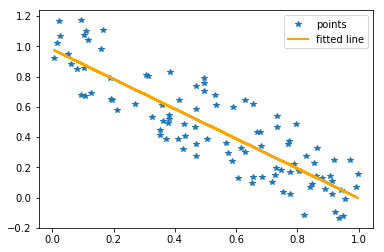

In [27]:
# Solution
#print line based on alpha0 and alpha1 
#plot points for all x,y
import matplotlib.pyplot as plt
% matplotlib inline

line_empty = np.ones((100,))
line_y = line_empty*x*sol[1]+sol[0]

plt.plot(A_transp[1,:],y,marker='*',ls='',label='points')
plt.plot(A_transp[1,:],line_y,marker='',lw=2,color='orange',label='fitted line')
plt.legend()

__Question 5:__ (1.5 points) Enrich the plot genereted in question 4 by incorporating a legend and an annotation indicating the fitted line, similar to the following figure:

![title](annotation.png)

In [28]:
# Solution

#see above for solution!! 